In [1]:
#mass is in units of 10e10 M_solar
#distances are in Kpc

#standard imports
import numpy as np
import h5py
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import os

from matplotlib.colors import LogNorm

In [2]:
matplotlib.rc('xtick', labelsize=10)
matplotlib.rc('ytick', labelsize=10)
matplotlib.rcParams['font.size']=10

matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rc('text', usetex=True)

ALPHA=0.8

FIG_HEIGHT = 8.5
FIG_WIDTH = 8.5

FIGSIZE=[FIG_WIDTH,FIG_HEIGHT]
DPI=300

In [3]:
def get_part_data(snap_path, partType=1):

    with h5py.File(snap_path, "r") as f:
        num = f['Header'].attrs['NumPart_Total'][partType]
        coords = f[f"PartType{partType}/Coordinates"]
        
        try:
            masses = f[f"PartType{partType}/Masses"][()]
        except:
            masses = f['Header'].attrs['MassTable'][partType] * np.ones(num)
        #convert from code units to solar masses
        masses *= 1e10/0.7
        
        average_z = np.mean(coords[:,2])
        std_z = np.std(coords[:,2])

        z_slice = (coords[:,2] < (average_z + std_z)) & (coords[:,2] > (average_z - std_z))
        
        return coords[:,0][z_slice], coords[:,1][z_slice], masses[z_slice], z_slice

In [4]:
outpath = '../../plots/plots_L3N256/particle-grid/'

try:
    os.mkdir(outpath)
except:
    print(f'{outpath} already exists!')

../../plots/plots_L3N256/particle-grid/ already exists!


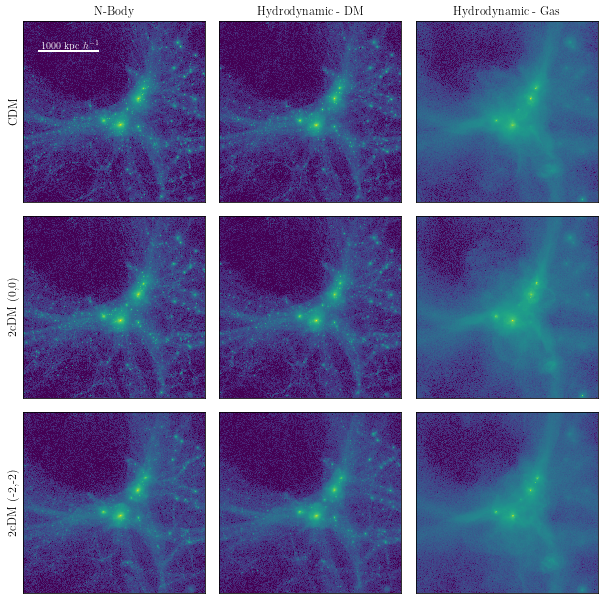

In [7]:
Nbins=500
base_path = '/home/ryan/Data/'

fig, ax = plt.subplots(3, 3, figsize=FIGSIZE)

snap = base_path + '/run_CDM_L3N256_DM/snap_007.hdf5'
x, y, m, zs = get_part_data(snap)
ax[0,0].hist2d(x, y, weights=m, norm=LogNorm(clip=True), bins=Nbins)
ax[0,0].set_ylabel("CDM", size='large')
ax[0,0].set_title("N-Body")

snap = base_path + '/run_CDM_L3N256_HY/snap_007.hdf5'
x, y, m, zs = get_part_data(snap)
ax[0,1].hist2d(x, y, weights=m, norm=LogNorm(clip=True), bins=Nbins)
ax[0,1].set_title("Hydrodynamic - DM")

snap = base_path + '/run_CDM_L3N256_HY/snap_007.hdf5'
x, y, m, zs = get_part_data(snap, partType=0)
ax[0,2].hist2d(x, y, weights=m, norm=LogNorm(clip=True), bins=Nbins)
ax[0,2].set_title("Hydrodynamic - Gas")

snap = base_path + '/run_2cDM_L3N256_DM_power00_sigma1/snap_007.hdf5'
x, y, m, zs = get_part_data(snap)
ax[1,0].hist2d(x, y, weights=m, norm=LogNorm(clip=True), bins=Nbins)
ax[1,0].set_ylabel("2cDM (0,0)", size='large')

snap = base_path + '/run_2cDM_L3N256_HY_power00_sigma1/snap_007.hdf5'
x, y, m, zs = get_part_data(snap)
ax[1,1].hist2d(x, y, weights=m, norm=LogNorm(clip=True), bins=Nbins)

snap = base_path + '/run_2cDM_L3N256_HY_power00_sigma1/snap_007.hdf5'
x, y, m, zs = get_part_data(snap, partType=0)
ax[1,2].hist2d(x, y, weights=m, norm=LogNorm(clip=True), bins=Nbins)

snap = base_path + '/run_2cDM_L3N256_DM_powerm2m2_sigma1/snap_007.hdf5'
x, y, m, zs = get_part_data(snap)
ax[2,0].hist2d(x, y, weights=m, norm=LogNorm(clip=True), bins=Nbins)
ax[2,0].set_ylabel("2cDM (-2,-2)", size='large')

snap = base_path + '/run_2cDM_L3N256_HY_powerm2m2_sigma1/snap_007.hdf5'
x, y, m, zs = get_part_data(snap)
ax[2,1].hist2d(x, y, weights=m, norm=LogNorm(clip=True), bins=Nbins)

snap = base_path + '/run_2cDM_L3N256_HY_powerm2m2_sigma1/snap_007.hdf5'
x, y, m, zs = get_part_data(snap, partType=0)
ax[2,2].hist2d(x, y, weights=m, norm=LogNorm(clip=True), bins=Nbins)

for a in ax.flat:
    a.set_aspect( 'auto', adjustable='box' )
    a.set_xticks([])
    a.set_yticks([])


ax[0,0].hlines(2500, 250, 1250, color='w', linewidth=2)
ax[0,0].text(300,  2550, '$1000$ kpc $h^{-1}$', color='w')

fig.tight_layout()

plt.savefig(outpath + 'L3N256-particles-grid.png', dpi=DPI)
plt.show()